Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

sns.set(style='whitegrid')
plt.rcParams["figure.figsize"] = (10, 6)

Generate a Custom Noisy Dataset

In [2]:
np.random.seed(42)

n = 1000

data = {
    "customer_id": np.arange(1, n + 1),
    "age": np.random.normal(35, 12, n),
    "income": np.random.normal(50000, 15000, n),
    "gender": np.random.choice(["Male", "Female", "Other"], size=n, p=[0.45, 0.45, 0.1]),
    "region": np.random.choice(["North", "South", "East", "West"], size=n),
    "signup_date": [datetime(2020, 1, 1) + timedelta(days=np.random.randint(0, 900)) for _ in range(n)],
    "product_category": np.random.choice(["A", "B", "C", "D"], size=n),
    "visits_last_month": np.random.poisson(lam=5, size=n),
    "time_on_site": np.abs(np.random.normal(20, 10, n)),
    "purchase_made": np.random.choice([0, 1], size=n, p=[0.7, 0.3])  # target
}

df = pd.DataFrame(data)

for col in ["age", "income", "gender"]:
    df.loc[df.sample(frac=0.1).index, col] = np.nan

df.loc[df.sample(frac=0.01).index, "income"] *= 5
df.loc[df.sample(frac=0.01).index, "time_on_site"] += 100

df.head()
print(df.describe())
print(df.isnull().sum())

       customer_id         age         income                 signup_date  \
count  1000.000000  900.000000     900.000000                        1000   
mean    500.500000   35.236025   53142.180945  2021-03-24 14:08:09.600000   
min       1.000000   -3.895208    5894.170480         2020-01-01 00:00:00   
25%     250.750000   27.328157   40820.957572         2020-08-12 00:00:00   
50%     500.500000   35.552050   50985.988490         2021-03-19 00:00:00   
75%     750.250000   42.720633   61094.596002         2021-10-24 00:00:00   
max    1000.000000   71.946570  383148.316946         2022-06-18 00:00:00   
std     288.819436   11.659895   26899.391700                         NaN   

       visits_last_month  time_on_site  purchase_made  
count        1000.000000   1000.000000    1000.000000  
mean            4.931000     21.009550       0.284000  
min             0.000000      0.060054       0.000000  
25%             3.000000     13.301616       0.000000  
50%             5.000000  

Save to CSV for Simulated Upload

In [3]:
df.to_csv("synthetic_customer_data.csv", index=False)

Univariate Analysis

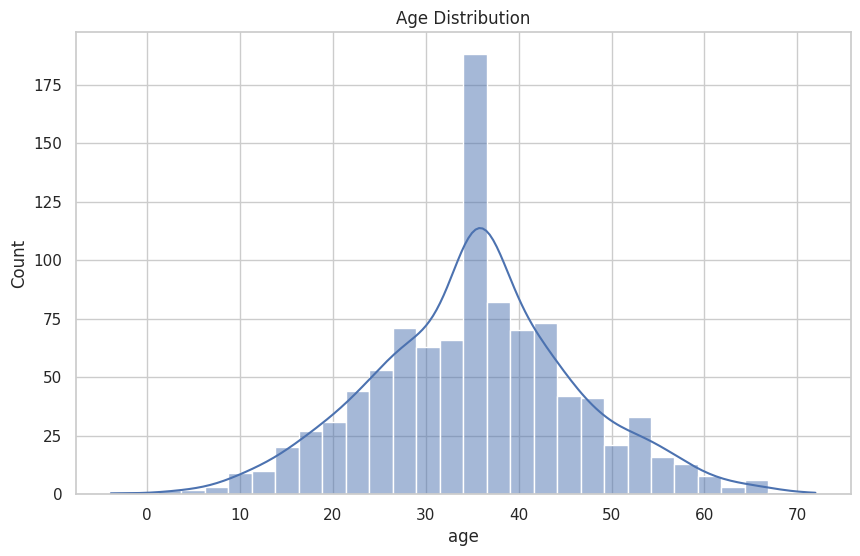

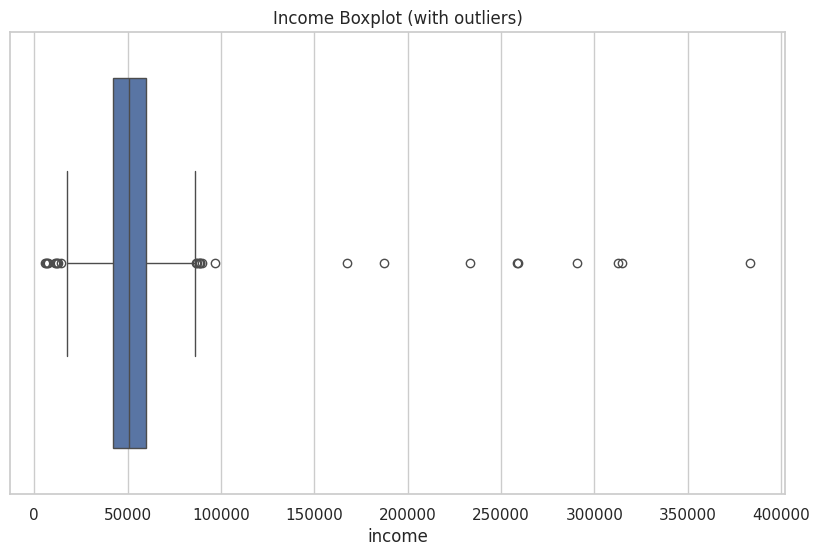

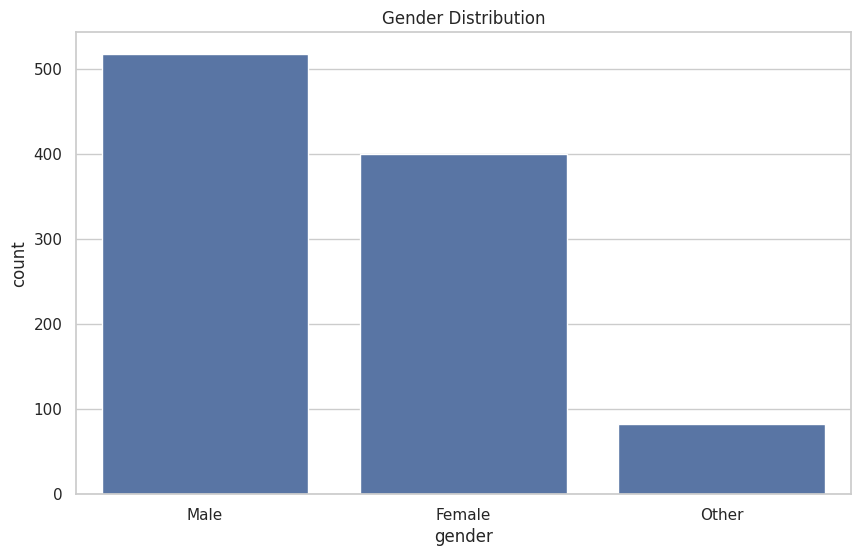

In [5]:
sns.histplot(df['age'], kde=True, bins=30)
plt.title("Age Distribution")
plt.show()

sns.boxplot(x='income', data=df)
plt.title("Income Boxplot (with outliers)")
plt.show()

sns.countplot(x='gender', data=df)
plt.title("Gender Distribution")
plt.show()

Bivariate Analysis

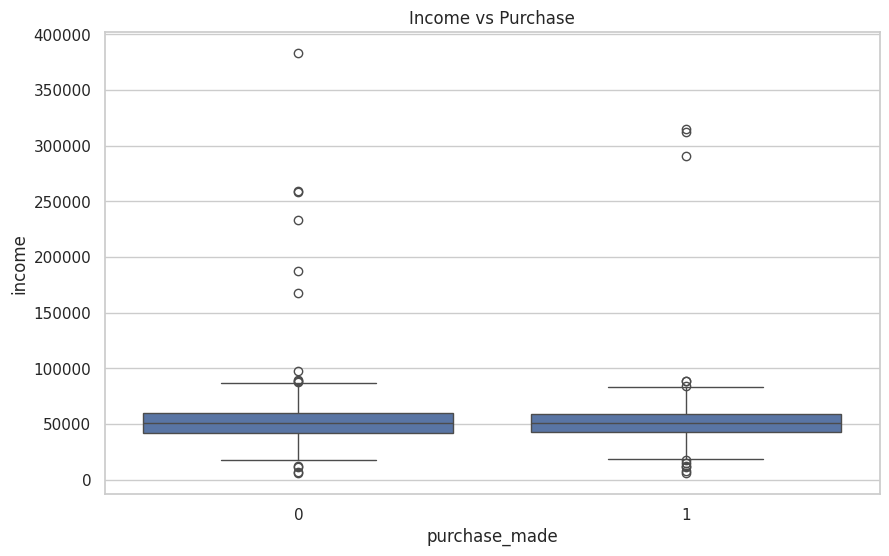

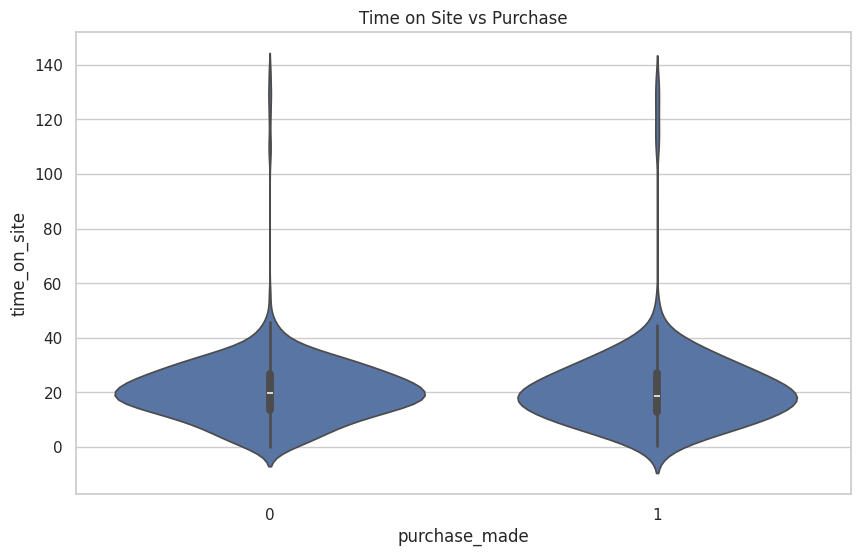

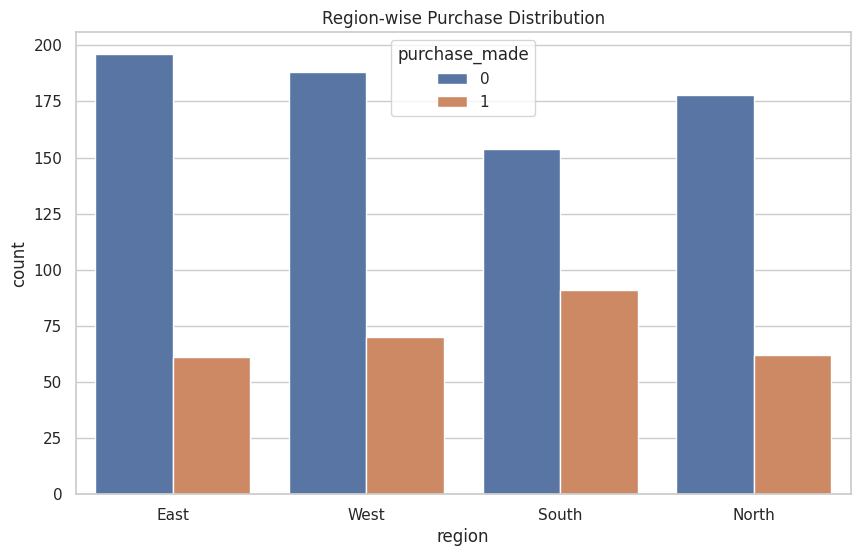

In [6]:
sns.boxplot(x='purchase_made', y='income', data=df)
plt.title("Income vs Purchase")
plt.show()

sns.violinplot(x='purchase_made', y='time_on_site', data=df)
plt.title("Time on Site vs Purchase")
plt.show()

sns.countplot(x='region', hue='purchase_made', data=df)
plt.title("Region-wise Purchase Distribution")
plt.show()

Feature Engineering

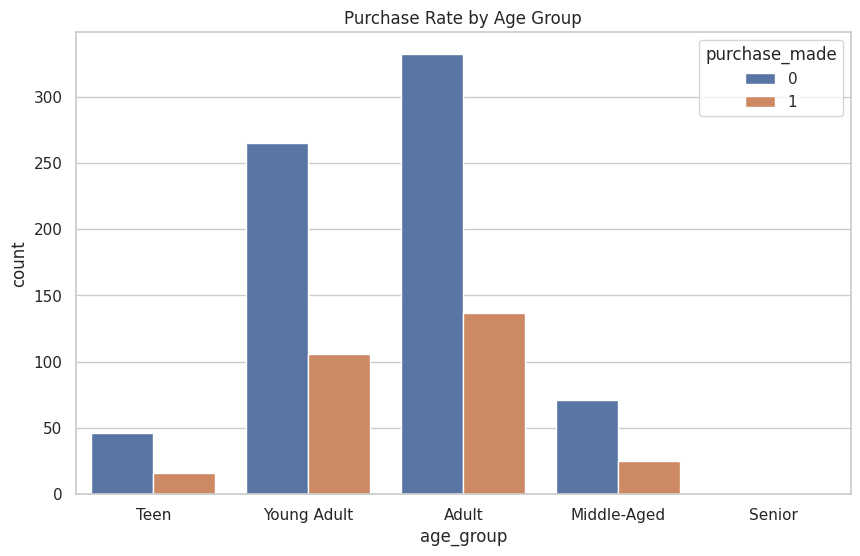

In [7]:
df['age_group'] = pd.cut(df['age'], bins=[0, 18, 35, 50, 70, 100], labels=['Teen', 'Young Adult', 'Adult', 'Middle-Aged', 'Senior'])
df['high_income'] = (df['income'] > 80000).astype(int)
df['frequent_visitor'] = (df['visits_last_month'] > 7).astype(int)

sns.countplot(x='age_group', hue='purchase_made', data=df)
plt.title("Purchase Rate by Age Group")
plt.show()

Correlation Analysis

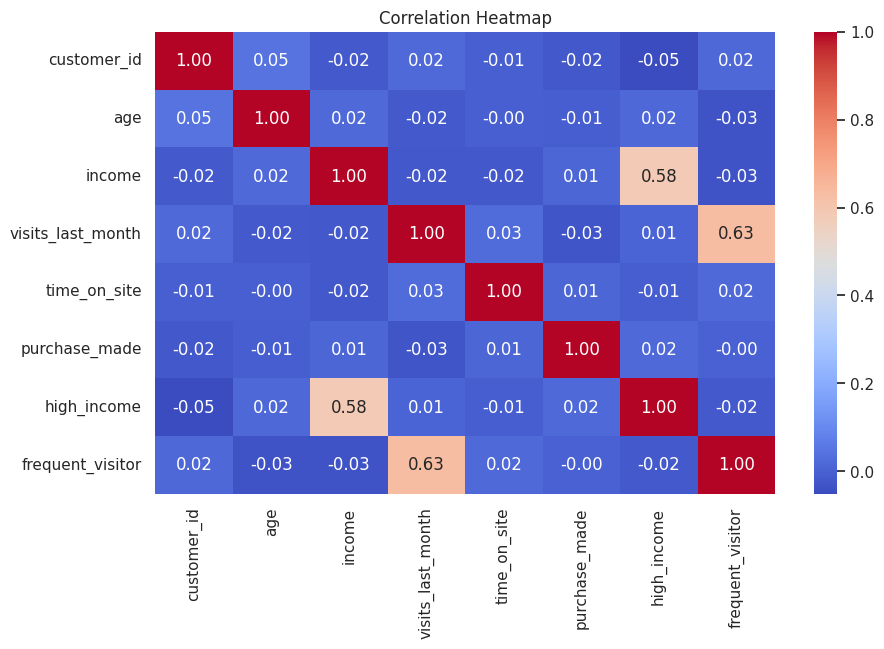

In [8]:
numeric_df = df.select_dtypes(include=np.number)
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()